In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime, shutil
import seaborn as sns
from itertools import product
from tqdm import tqdm

In [2]:
df = pd.read_csv("./data/202210-citibike-tripdata.csv")
df.head()

/var/folders/cy/_2wctjwx3svb9bqm3mq24h680000gn/T/ipykernel_67347/3154075721.py:1: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./data/202210-citibike-tripdata.csv")


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,2CF35A89B21C6E3C,classic_bike,2022-10-24 14:30:25,2022-10-24 14:37:35,St. Nicholas Ave & W 126 St,7756.10,Amsterdam Ave & W 136 St,7920.05,40.811388,-73.951995,40.819746,-73.951819,member
1,291CC2C6D361C2DA,classic_bike,2022-10-30 03:53:38,2022-10-30 03:57:57,Stuyvesant Ave & Gates Ave,4458.06,Halsey St & Tompkins Ave,4319.07,40.688445,-73.933195,40.682369,-73.944118,member
2,80192DC8429B07EE,classic_bike,2022-10-08 15:03:06,2022-10-08 15:17:13,Broadway & Berry St,5164.05,Meserole Ave & Manhattan Ave,5666.04,40.710361,-73.965304,40.727086,-73.952991,member
3,D214E550C317C65E,classic_bike,2022-10-18 08:32:04,2022-10-18 08:36:41,W 84 St & Columbus Ave,7382.04,W 76 St & Columbus Ave,7281.09,40.785000,-73.972834,40.780184,-73.977285,member
4,2D23E8BAE75AA184,classic_bike,2022-10-26 08:00:40,2022-10-26 08:10:27,Pike St & Monroe St,5159.04,Broad St & Bridge St,4962.08,40.711731,-73.991930,40.703652,-74.011678,member


In [3]:
df.shape

(3021670, 13)

In [4]:
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

In [5]:
df = df.sort_values(by="started_at")

In [6]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
75477,FEAACC6431F354D1,classic_bike,2022-10-01 00:00:07,2022-10-01 00:09:22,E 84 St & 1 Ave,7180.02,1 Ave & E 62 St,6753.08,40.775655,-73.950686,40.761227,-73.960940,member
2275037,734F3524A3BB53A8,electric_bike,2022-10-01 00:00:10,2022-10-01 00:05:10,Columbus Ave & W 72 St,7175.05,Broadway & W 53 St,6779.05,40.777057,-73.978985,40.763441,-73.982681,casual
1425703,D3859226F0F1B027,electric_bike,2022-10-01 00:00:10,2022-10-01 00:06:19,1 Ave & E 39 St,6303.01,W 37 St & 5 Ave,6398.06,40.747140,-73.971130,40.750380,-73.983390,member
857983,903D5D8EB3B84623,electric_bike,2022-10-01 00:00:10,2022-10-01 00:04:37,Pacific St & Nevins St,4362.04,State St & Smith St,4522.07,40.685376,-73.983021,40.689170,-73.988600,member
2243770,A3A9E7B825A17CA0,classic_bike,2022-10-01 00:00:12,2022-10-01 00:10:02,Lexington Ave & E 26 St,6089.08,E 4 St & 2 Ave,5593.04,40.741459,-73.983293,40.726281,-73.989780,member


In [7]:
remove_df = df[["ride_id", "rideable_type", "started_at", "start_station_name", "start_station_id", "start_lat", "start_lng", "member_casual"]]
remove_df["time"] = remove_df["started_at"]
remove_df["lat"] = remove_df["start_lat"]
remove_df["lng"] = remove_df["start_lng"]
remove_df["station"] = remove_df["start_station_name"]
remove_df["station_id"] = remove_df["start_station_id"]
remove_df["type"] = "remove"
remove_df = remove_df.drop(columns=["started_at", "start_lat", "start_lng", "start_station_name", "start_station_id"])

add_df = df[["ride_id", "rideable_type", "ended_at", "end_station_name", "end_station_id", "end_lat", "end_lng", "member_casual"]]
add_df["time"] = add_df["ended_at"]
add_df["lat"] = add_df["end_lat"]
add_df["lng"] = add_df["end_lng"]
add_df["station"] = add_df["end_station_name"]
add_df["station_id"] = add_df["end_station_id"]
add_df["type"] = "add"
add_df = add_df.drop(columns=["ended_at", "end_lat", "end_lng", "end_station_name", "end_station_id"])

/var/folders/cy/_2wctjwx3svb9bqm3mq24h680000gn/T/ipykernel_33865/2583912207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_df["time"] = remove_df["started_at"]
/var/folders/cy/_2wctjwx3svb9bqm3mq24h680000gn/T/ipykernel_33865/2583912207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  remove_df["lat"] = remove_df["start_lat"]
/var/folders/cy/_2wctjwx3svb9bqm3mq24h680000gn/T/ipykernel_33865/2583912207.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [8]:
add_df = add_df.dropna()
remove_df = remove_df.dropna()
df_merge = pd.concat([add_df, remove_df], axis=0)

In [9]:
df.shape, df_merge.shape

((3021670, 13), (6036862, 9))

In [ ]:
df_merge = df_merge.sort_values(by="time")
df_merge.head()

,ride_id,rideable_type,member_casual,time,lat,lng,station,station_id,type
75477,FEAACC6431F354D1,classic_bike,member,2022-10-01 00:00:07,40.775655,-73.950686,E 84 St & 1 Ave,7180.02,remove
857983,903D5D8EB3B84623,electric_bike,member,2022-10-01 00:00:10,40.685376,-73.983021,Pacific St & Nevins St,4362.04,remove
1425703,D3859226F0F1B027,electric_bike,member,2022-10-01 00:00:10,40.747140,-73.971130,1 Ave & E 39 St,6303.01,remove
2275037,734F3524A3BB53A8,electric_bike,casual,2022-10-01 00:00:10,40.777057,-73.978985,Columbus Ave & W 72 St,7175.05,remove
2243770,A3A9E7B825A17CA0,classic_bike,member,2022-10-01 00:00:12,40.741459,-73.983293,Lexington Ave & E 26 St,6089.08,remove


In [12]:
bike_counts_per_station = remove_df[["ride_id", "station"]].groupby(by="station").count()
bike_counts_per_station = bike_counts_per_station.sort_index()
mean_coords_per_station = remove_df[["lat", "lng", "station"]].groupby(by="station").mean()
mean_coords_per_station = mean_coords_per_station.sort_index()

In [13]:
stations = bike_counts_per_station.index.to_list()

In [15]:
print(bike_counts_per_station.head())
print(mean_coords_per_station.head())

                  ride_id
station                  
1 Ave & E 110 St     2188
1 Ave & E 16 St      6826
1 Ave & E 18 St      6520
1 Ave & E 30 St      3979
1 Ave & E 39 St      4923
                        lat        lng
station                               
1 Ave & E 110 St  40.792340 -73.938260
1 Ave & E 16 St   40.732232 -73.981650
1 Ave & E 18 St   40.733855 -73.980533
1 Ave & E 30 St   40.741438 -73.975349
1 Ave & E 39 St   40.747180 -73.971114


In [ ]:
# populate bikes
# NUM_BIKES_FOR_EACH_STATION = 500

counts = bike_counts_per_station.to_numpy()
mean_coords = mean_coords_per_station.to_numpy()

# mean_coords = np.tile(mean_coords[:, None, :], [1, NUM_BIKES_FOR_EACH_STATION, 1])
# mean_coords = mean_coords.reshape(-1, 2)

# scale = np.ones_like(mean_coords) * 1e-3

# initialized_bikes = np.random.normal(loc=mean_coords, scale=scale)
# bike_ids = np.arange(len(initialized_bikes))
# initialized_bikes = np.concatenate([bike_ids[:, None], initialized_bikes], axis=1)
# initialized_bikes.shape

(822500, 3)

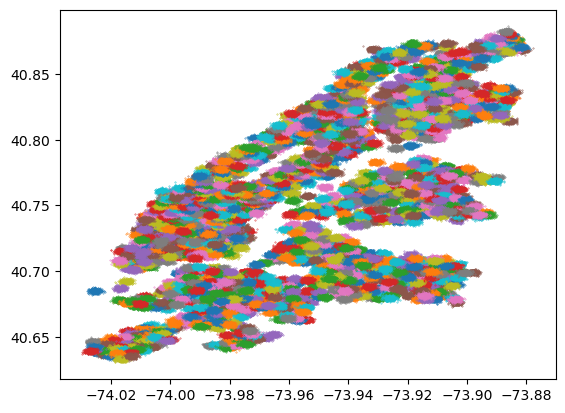

In [21]:
# counts_shape_0 = np.random.choice(np.arange(counts.shape[0]), size=100, replace=False)
counts_shape_0 = np.arange(counts.shape[0])

for i in counts_shape_0:
    plt.scatter(initialized_bikes[i*NUM_BIKES_FOR_EACH_STATION:(i + 1)*NUM_BIKES_FOR_EACH_STATION, 2], initialized_bikes[i*NUM_BIKES_FOR_EACH_STATION:(i + 1)*NUM_BIKES_FOR_EACH_STATION, 1], s=0.1)
plt.show()

In [17]:
bikes = initialized_bikes

In [105]:
def remap_station_id(row):
    if row["station"] not in stations:
        return None
    else:
        st_index = stations.index(row["station"])
        return st_index

df_merge["station_id"] = df_merge.apply(remap_station_id, axis=1)

In [106]:
print(df_merge.shape)
df_merge = df_merge.dropna()
print(df_merge.shape)

(6036862, 9)
(6036601, 9)


In [111]:
df_merge["station_id"] = np.int32(df_merge["station_id"])

/var/folders/cy/_2wctjwx3svb9bqm3mq24h680000gn/T/ipykernel_59612/3486024537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge["station_id"] = np.int32(df_merge["station_id"])


In [14]:
# df_merge.to_csv("parsed/citibike_streaming.csv")
df_merge = pd.read_csv("parsed/citibike_streaming.csv", index_col=0)
df_merge.head()

,ride_id,rideable_type,member_casual,time,lat,lng,station,station_id,type
75477,FEAACC6431F354D1,classic_bike,member,2022-10-01 00:00:07,40.775655,-73.950686,E 84 St & 1 Ave,811,remove
857983,903D5D8EB3B84623,electric_bike,member,2022-10-01 00:00:10,40.685376,-73.983021,Pacific St & Nevins St,1203,remove
1425703,D3859226F0F1B027,electric_bike,member,2022-10-01 00:00:10,40.747140,-73.971130,1 Ave & E 39 St,4,remove
2275037,734F3524A3BB53A8,electric_bike,casual,2022-10-01 00:00:10,40.777057,-73.978985,Columbus Ave & W 72 St,581,remove
2243770,A3A9E7B825A17CA0,classic_bike,member,2022-10-01 00:00:12,40.741459,-73.983293,Lexington Ave & E 26 St,1068,remove


In [ ]:
df_merge["time"] = pd.to_datetime(df_merge["time"])
df_merge["time"].min(), df_merge["time"].max()

(Timestamp('2022-10-01 00:00:07'), Timestamp('2022-11-06 09:20:04'))

In [24]:
from functools import partial

In [30]:
# from copy import deepcopy

# populate bikes
def populate_bikes(num_bikes_for_each_station=20):
    mean_coords = mean_coords_per_station.to_numpy()

    mean_coords = np.tile(mean_coords[:, None, :], [1, num_bikes_for_each_station, 1])
    mean_coords = mean_coords.reshape(-1, 2)

    scale = np.ones_like(mean_coords) * 1e-3

    initialized_bikes = np.random.normal(loc=mean_coords, scale=scale)
    bike_ids = np.arange(len(initialized_bikes))
    initialized_bikes = np.concatenate([bike_ids[:, None], initialized_bikes], axis=1)

    bikes_per_stations = [
        bike_ids[i*num_bikes_for_each_station:(i+1)*num_bikes_for_each_station].tolist()
        for i in range(len(stations))
    ]
    return initialized_bikes, bikes_per_stations

In [ ]:

def get_random_bike_at_station(row, bikes_per_stations):
    if row["type"] == "remove":
        station_id = row["station_id"]
        bike_id = bikes_per_stations[station_id].pop(0)
    else:
        bike_id = -1

    return bike_id

def generate_streaming_data():
    ride_id_to_bike_id = {}

    for d in range(1, 31):
        for h in range(9, 18, 3):
            year_start, month_start, day_start, hour_start = 2022, 10, d, h
            year_end, month_end, day_end, hour_end = year_start, month_start, d, h + 3

            bikes, bikes_per_stations = populate_bikes(num_bikes_for_each_station=50)
            print(bikes.shape)

            s = datetime.datetime(year=year_start, month=month_start, day=day_start, hour=hour_start)
            e = datetime.datetime(year=year_end, month=month_end, day=day_end, hour=hour_end)

            subdf = df_merge[(df_merge["time"] >= s) & (df_merge["time"] < e)]

            batch_size = 50
            N = len(subdf)
            num_batches = int(np.ceil(N / batch_size))

            try:
                init_file_path = f"parsed/day/citibike_streaming_init_{year_start}-{month_start}-{day_start}-{hour_start}.txt"
                data_file_path = f"parsed/day/citibike_streaming_{year_start}-{month_start}-{day_start}-{hour_start}.txt"
                with open(init_file_path, "w") as f:
                    for i in range(bikes.shape[0]):
                        f.write(f"create {int(bikes[i, 0])} {bikes[i, 1]} {bikes[i, 2]}\n")

                with open(data_file_path, "w") as f:
                    for b in tqdm(range(num_batches)):
                        start_index = b*batch_size
                        end_index = min((b + 1)*batch_size, N)

                        batch = subdf[["ride_id", "lat", "lng", "type", "station_id", "time"]].iloc[start_index:end_index]
                        bike_id_batch = batch.apply(partial(get_random_bike_at_station, bikes_per_stations=bikes_per_stations), axis=1)

                        for i in range(len(batch)):
                            ride_id, lat, lng, tp, st_id, time = batch.iloc[i]
                            if tp == "add":
                                if ride_id in ride_id_to_bike_id.keys():
                                    bike_id = ride_id_to_bike_id[ride_id]
                                    bikes_per_stations[st_id].append(bike_id)
                                    bikes[bike_id, 1:] = [lat, lng]
                                    del ride_id_to_bike_id[ride_id]
                                    f.write(f"create {bike_id} {lat} {lng} {time}\n")
                            elif tp == "remove":
                                bike_id = bike_id_batch.iloc[i]
                                ride_id_to_bike_id[ride_id] = bike_id
                                f.write(f"remove {bike_id} {lat} {lng} {time}\n")
            except IndexError as e:
                shutil.move(init_file_path, init_file_path.replace("day/", "day/error/"))
                shutil.move(data_file_path, data_file_path.replace("day/", "day/error/"))

In [ ]:
generate_streaming_data() 

(49350, 3)


100%|██████████| 275/275 [00:00<00:00, 506.44it/s]


(49350, 3)


100%|██████████| 551/551 [00:01<00:00, 446.66it/s]


(49350, 3)


100%|██████████| 680/680 [00:01<00:00, 426.07it/s]


(49350, 3)


100%|██████████| 354/354 [00:00<00:00, 463.34it/s]


(49350, 3)


100%|██████████| 341/341 [00:00<00:00, 522.24it/s]


(49350, 3)


100%|██████████| 434/434 [00:00<00:00, 483.24it/s]


(49350, 3)


 65%|██████▍   | 295/454 [00:00<00:00, 485.66it/s]


(49350, 3)


100%|██████████| 358/358 [00:00<00:00, 505.21it/s]


(49350, 3)


100%|██████████| 319/319 [00:00<00:00, 511.55it/s]


(49350, 3)


100%|██████████| 254/254 [00:00<00:00, 506.19it/s]


(49350, 3)


100%|██████████| 237/237 [00:00<00:00, 473.29it/s]


(49350, 3)


 53%|█████▎    | 293/553 [00:00<00:00, 468.71it/s]


(49350, 3)


100%|██████████| 320/320 [00:00<00:00, 492.61it/s]


(49350, 3)


100%|██████████| 547/547 [00:01<00:00, 456.10it/s]


(49350, 3)


 56%|█████▋    | 390/691 [00:00<00:00, 391.29it/s]


(49350, 3)


 67%|██████▋   | 455/677 [00:01<00:00, 416.90it/s]


(49350, 3)


 52%|█████▏    | 381/737 [00:00<00:00, 424.74it/s]


(49350, 3)


 28%|██▊       | 338/1211 [00:00<00:02, 381.95it/s]


(49350, 3)


 80%|███████▉  | 563/708 [00:01<00:00, 439.24it/s]


(49350, 3)


 61%|██████    | 542/894 [00:01<00:00, 376.25it/s]


(49350, 3)


 46%|████▌     | 586/1272 [00:01<00:01, 362.58it/s]


(49350, 3)


100%|██████████| 682/682 [00:01<00:00, 436.92it/s]


(49350, 3)


 62%|██████▏   | 607/980 [00:01<00:00, 400.58it/s]


(49350, 3)


 29%|██▊       | 289/1011 [00:00<00:01, 383.72it/s]


(49350, 3)


 60%|█████▉    | 342/573 [00:00<00:00, 474.96it/s]


(49350, 3)


 49%|████▉     | 458/935 [00:01<00:01, 419.74it/s]


(49350, 3)


 42%|████▏     | 422/1013 [00:01<00:01, 417.48it/s]


(49350, 3)


 88%|████████▊ | 485/551 [00:01<00:00, 459.62it/s]


(49350, 3)


100%|██████████| 734/734 [00:01<00:00, 454.18it/s]


(49350, 3)


 45%|████▌     | 459/1018 [00:01<00:01, 386.66it/s]


(49350, 3)


100%|██████████| 615/615 [00:01<00:00, 463.63it/s]


(49350, 3)


100%|██████████| 659/659 [00:01<00:00, 450.64it/s]


(49350, 3)


 34%|███▍      | 383/1128 [00:01<00:01, 382.35it/s]


(49350, 3)


100%|██████████| 677/677 [00:01<00:00, 450.76it/s]


(49350, 3)


 52%|█████▏    | 384/734 [00:00<00:00, 433.49it/s]


(49350, 3)


 44%|████▎     | 515/1180 [00:01<00:01, 365.01it/s]


(49350, 3)


 78%|███████▊  | 482/620 [00:01<00:00, 463.90it/s]


(49350, 3)


100%|██████████| 462/462 [00:00<00:00, 486.67it/s]


(49350, 3)


 73%|███████▎  | 511/698 [00:01<00:00, 444.55it/s]


(49350, 3)


 93%|█████████▎| 569/609 [00:01<00:00, 467.05it/s]


(49350, 3)


 46%|████▋     | 376/809 [00:00<00:01, 426.49it/s]


(49350, 3)


 37%|███▋      | 454/1220 [00:01<00:02, 366.80it/s]


(49350, 3)


 95%|█████████▌| 741/780 [00:01<00:00, 433.49it/s]


(49350, 3)


 81%|████████▏ | 944/1159 [00:02<00:00, 376.13it/s]


(49350, 3)


 18%|█▊        | 213/1199 [00:00<00:02, 336.71it/s]


(49350, 3)


100%|██████████| 650/650 [00:01<00:00, 409.14it/s]


(49350, 3)


 60%|█████▉    | 595/993 [00:01<00:01, 347.96it/s]


(49350, 3)


 26%|██▌       | 278/1066 [00:00<00:02, 308.17it/s]


(49350, 3)


100%|██████████| 488/488 [00:01<00:00, 461.66it/s]


(49350, 3)


100%|██████████| 605/605 [00:01<00:00, 453.22it/s]


(49350, 3)


 46%|████▌     | 481/1042 [00:01<00:01, 389.80it/s]


(49350, 3)


 73%|███████▎  | 405/557 [00:00<00:00, 473.63it/s]


(49350, 3)


 52%|█████▏    | 308/592 [00:00<00:00, 449.54it/s]


(49350, 3)


 30%|███       | 309/1029 [00:00<00:01, 373.43it/s]


(49350, 3)


 87%|████████▋ | 506/584 [00:01<00:00, 469.39it/s]


(49350, 3)


100%|██████████| 607/607 [00:01<00:00, 409.60it/s]


(49350, 3)


 41%|████      | 399/973 [00:01<00:01, 380.03it/s]


(49350, 3)


100%|██████████| 608/608 [00:01<00:00, 424.75it/s]


(49350, 3)


100%|██████████| 632/632 [00:01<00:00, 430.99it/s]


(49350, 3)


 25%|██▍       | 258/1038 [00:00<00:02, 324.60it/s]


(49350, 3)


 74%|███████▍  | 444/600 [00:00<00:00, 455.54it/s]


(49350, 3)


 63%|██████▎   | 497/786 [00:01<00:00, 438.63it/s]


(49350, 3)


 50%|████▉     | 574/1150 [00:01<00:01, 369.88it/s]


(49350, 3)


 70%|██████▉   | 517/742 [00:01<00:00, 302.94it/s]


(49350, 3)


 60%|█████▉    | 670/1126 [00:01<00:01, 365.82it/s]


(49350, 3)


 20%|█▉        | 220/1122 [00:00<00:02, 384.09it/s]


(49350, 3)


 44%|████▍     | 235/531 [00:00<00:00, 478.32it/s]


(49350, 3)


100%|██████████| 592/592 [00:01<00:00, 415.72it/s]


(49350, 3)


100%|██████████| 591/591 [00:01<00:00, 456.53it/s]


(49350, 3)


100%|██████████| 396/396 [00:01<00:00, 382.48it/s]


(49350, 3)


100%|██████████| 491/491 [00:01<00:00, 459.54it/s]


(49350, 3)


 46%|████▌     | 357/776 [00:00<00:01, 370.34it/s]


(49350, 3)


 62%|██████▏   | 313/505 [00:00<00:00, 472.74it/s]


(49350, 3)


100%|██████████| 565/565 [00:01<00:00, 448.16it/s]


(49350, 3)


 32%|███▏      | 334/1046 [00:01<00:03, 229.64it/s]


(49350, 3)


 58%|█████▊    | 362/623 [00:01<00:00, 348.35it/s]


(49350, 3)


 53%|█████▎    | 359/682 [00:00<00:00, 425.18it/s]


(49350, 3)


 32%|███▏      | 360/1134 [00:01<00:02, 347.38it/s]


(49350, 3)


 49%|████▉     | 323/659 [00:00<00:00, 408.91it/s]


(49350, 3)


 47%|████▋     | 346/734 [00:01<00:01, 329.31it/s]


(49350, 3)


 49%|████▉     | 567/1162 [00:01<00:01, 335.38it/s]


(49350, 3)


 99%|█████████▊| 594/603 [00:01<00:00, 452.27it/s]


(49350, 3)


 52%|█████▏    | 404/773 [00:01<00:00, 379.81it/s]


(49350, 3)


 43%|████▎     | 477/1105 [00:01<00:01, 320.67it/s]


(49350, 3)


 75%|███████▍  | 483/646 [00:01<00:00, 375.06it/s]


(49350, 3)


 34%|███▍      | 357/1041 [00:01<00:01, 343.20it/s]


(49350, 3)


 20%|█▉        | 210/1076 [00:00<00:02, 336.37it/s]


(49350, 3)


 87%|████████▋ | 482/557 [00:01<00:00, 400.44it/s]


(49350, 3)


 93%|█████████▎| 902/974 [00:02<00:00, 399.36it/s]


(49350, 3)


 61%|██████▏   | 648/1056 [00:01<00:01, 327.52it/s]


In [ ]:
def get_stations(df):
    station_names = list(df["start_station_name"].unique()) + list(df["end_station_name"].unique())
    station_names = np.unique(station_names)
    station_names = list(name for name in station_names if name != "nan")

    station_coords = dict()

    for station_name in station_names:
        started_at_the_station = df[df["start_station_name"] == station_name][["start_lat", "start_lng"]].dropna().to_numpy()
        ended_at_the_station = df[df["end_station_name"] == station_name][["end_lat", "end_lng"]].dropna().to_numpy()

        if len(started_at_the_station) > 0 and len(ended_at_the_station) > 0:
            ratio = len(started_at_the_station) / (len(started_at_the_station) + len(ended_at_the_station))
            coord = started_at_the_station.mean(axis=0) * ratio + ended_at_the_station.mean(axis=0) * (1 - ratio)
        elif len(started_at_the_station) > 0:
            coord = started_at_the_station.mean(axis=0)
        elif len(ended_at_the_station) > 0:
            coord = ended_at_the_station.mean(axis=0)

        station_coords[station_name] = coord

    return station_coords

In [ ]:
station_coords = get_stations(df)
# station_coords

In [11]:
import folium

m = folium.Map(location=[40.751388, -73.951995], zoom_start=12)

for key, coord in station_coords.items():
    folium.CircleMarker(
        location=coord,
        radius=5, # 원 크기
        color='blue', # 원 선 색상
        fill_color='blue', # 원 내부 색상
    ).add_to(m)

m

In [125]:
1

1